In [1]:
import joblib
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,LabelEncoder,RobustScaler
from sklearn.metrics import mean_absolute_error,r2_score
from sklearn.ensemble import RandomForestRegressor

In [2]:
df = pd.read_csv('dataset.csv')
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


/var/folders/rv/vbp_kfc933z6m33kd9rjbtcc0000gn/T/ipykernel_20350/882118549.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=missing_value, y=missing_value.index, palette='viridis')


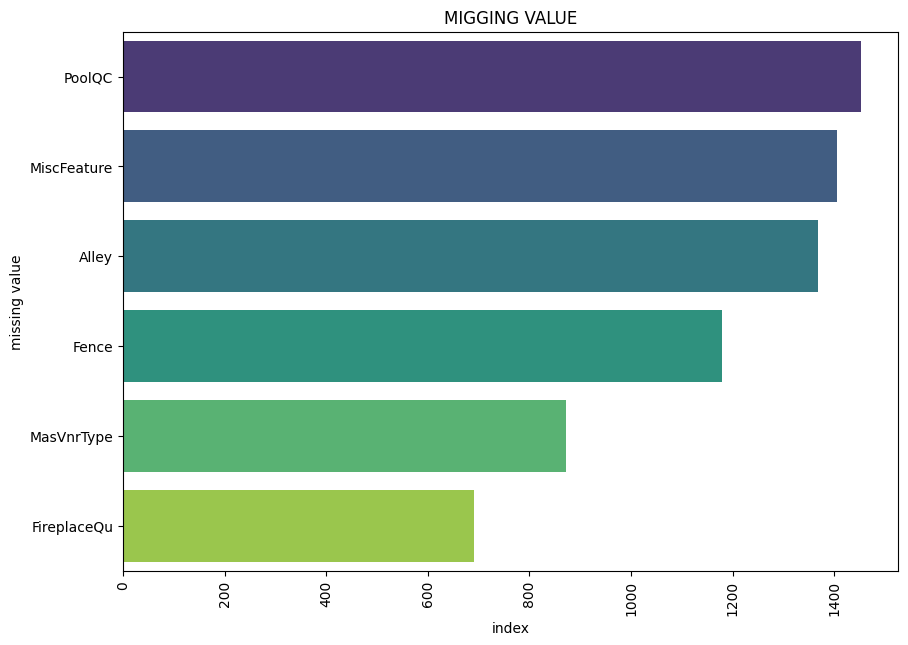

In [3]:
missing_value = df.isnull().sum().sort_values(ascending=False)
missing_value = missing_value[missing_value > 500]
plt.figure(figsize=(10, 7))
sns.barplot(x=missing_value, y=missing_value.index, palette='viridis')
plt.xticks(rotation=90)
plt.title("MIGGING VALUE")
plt.xlabel('index')
plt.ylabel('missing value')
plt.show()

In [4]:
df.drop(columns=['Id', 'PoolQC', 'FireplaceQu', 'Fence', 'Alley', 'MiscFeature','MasVnrType'],inplace=True)
df.dropna(inplace=True)
df.drop_duplicates(inplace=True)
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,12,2008,WD,Normal,250000


In [5]:
df.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrArea', 'ExterQual',
       'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure',
       'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF',
       'TotalBsmtSF', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical',
       '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath',
       'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr',
       'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPor

In [6]:
catagorical_columns = df.select_dtypes(include=['object','category']).columns
numerical_columns = df.select_dtypes(include=['int64','float64']).columns
print(f"Catagorical columns: {catagorical_columns}")
print('-'*50,'X','-'*50)
print(f"Numerical columns: {numerical_columns}")

Catagorical columns: Index(['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional',
       'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive',
       'SaleType', 'SaleCondition'],
      dtype='object')
-------------------------------------------------- X --------------------------------------------------
Numerical columns: Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'Bsm

In [7]:
le = LabelEncoder()
for col in catagorical_columns:
    df[col] = le.fit_transform(df[col])
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,3,65.0,8450,1,3,3,0,4,0,...,0,0,0,0,0,2,2008,8,4,208500
1,20,3,80.0,9600,1,3,3,0,2,0,...,0,0,0,0,0,5,2007,8,4,181500
2,60,3,68.0,11250,1,0,3,0,4,0,...,0,0,0,0,0,9,2008,8,4,223500
3,70,3,60.0,9550,1,0,3,0,0,0,...,272,0,0,0,0,2,2006,8,0,140000
4,60,3,84.0,14260,1,0,3,0,2,0,...,0,0,0,0,0,12,2008,8,4,250000


In [8]:
corr_matrix = df.corr()
corr_with_target = corr_matrix['SalePrice'].sort_values(ascending=False)
print(f'Coreletion with target:\n{corr_with_target.head(25)}')

Coreletion with target:
SalePrice        1.000000
OverallQual      0.795437
GrLivArea        0.707481
GarageCars       0.652103
GarageArea       0.620772
TotalBsmtSF      0.617741
1stFlrSF         0.617692
FullBath         0.578299
TotRmsAbvGrd     0.560521
YearBuilt        0.523434
YearRemodAdd     0.519806
GarageYrBlt      0.502248
MasVnrArea       0.485409
Foundation       0.459949
Fireplaces       0.458182
BsmtFinSF1       0.378678
LotFrontage      0.343978
OpenPorchSF      0.338600
WoodDeckSF       0.330286
2ndFlrSF         0.302569
LotArea          0.302268
HalfBath         0.259469
RoofStyle        0.248867
Neighborhood     0.242889
SaleCondition    0.226824
Name: SalePrice, dtype: float64


In [9]:
c_features = corr_with_target[corr_with_target > 0.20].index
print(c_features)

Index(['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea',
       'TotalBsmtSF', '1stFlrSF', 'FullBath', 'TotRmsAbvGrd', 'YearBuilt',
       'YearRemodAdd', 'GarageYrBlt', 'MasVnrArea', 'Foundation', 'Fireplaces',
       'BsmtFinSF1', 'LotFrontage', 'OpenPorchSF', 'WoodDeckSF', '2ndFlrSF',
       'LotArea', 'HalfBath', 'RoofStyle', 'Neighborhood', 'SaleCondition',
       'BsmtFullBath', 'Electrical', 'CentralAir'],
      dtype='object')


In [10]:
df = df[c_features]

In [11]:
df.head()

,SalePrice,OverallQual,GrLivArea,GarageCars,GarageArea,TotalBsmtSF,1stFlrSF,FullBath,TotRmsAbvGrd,YearBuilt,...,WoodDeckSF,2ndFlrSF,LotArea,HalfBath,RoofStyle,Neighborhood,SaleCondition,BsmtFullBath,Electrical,CentralAir
0,208500,7,1710,2,548,856,856,2,8,2003,...,0,854,8450,1,1,5,4,1,4,1
1,181500,6,1262,2,460,1262,1262,2,6,1976,...,298,0,9600,0,1,24,4,0,4,1
2,223500,7,1786,2,608,920,920,2,6,2001,...,0,866,11250,1,1,5,4,1,4,1
3,140000,7,1717,3,642,756,961,1,7,1915,...,0,756,9550,0,1,6,0,1,4,1
4,250000,8,2198,3,836,1145,1145,2,9,2000,...,192,1053,14260,1,1,15,4,1,4,1


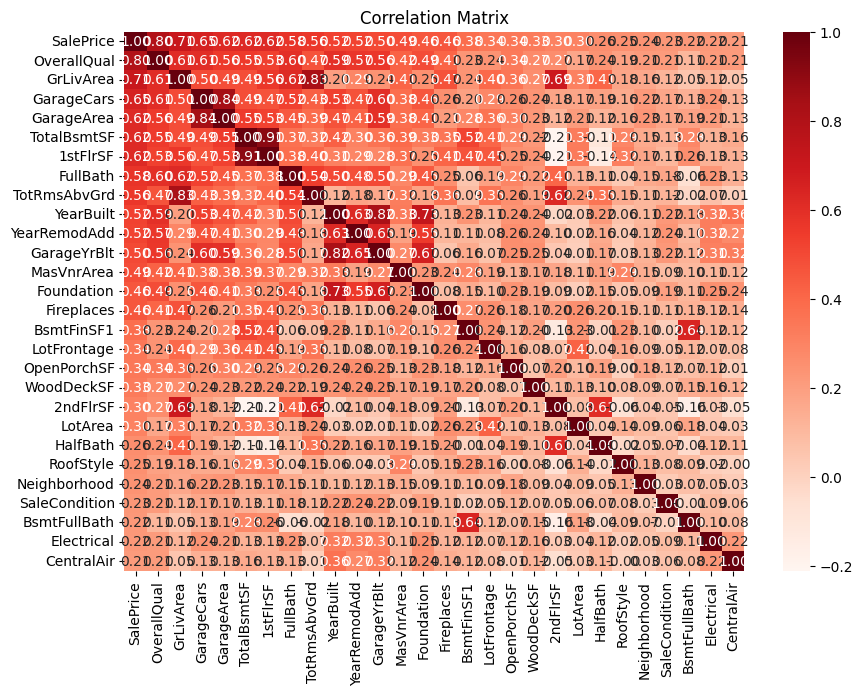

In [12]:
plt.figure(figsize=(10, 7))
sns.heatmap(df.corr(), annot=True, fmt='.2f', cmap='Reds')
plt.title("Correlation Matrix")
plt.show()

In [13]:
df = df.drop(columns=[ 'GarageCars', 'GarageYrBlt', 'TotRmsAbvGrd', 'Foundation', '2ndFlrSF', 'HalfBath', 'TotalBsmtSF' ])
df.head()

,SalePrice,OverallQual,GrLivArea,GarageArea,1stFlrSF,FullBath,YearBuilt,YearRemodAdd,MasVnrArea,Fireplaces,...,LotFrontage,OpenPorchSF,WoodDeckSF,LotArea,RoofStyle,Neighborhood,SaleCondition,BsmtFullBath,Electrical,CentralAir
0,208500,7,1710,548,856,2,2003,2003,196.0,0,...,65.0,61,0,8450,1,5,4,1,4,1
1,181500,6,1262,460,1262,2,1976,1976,0.0,1,...,80.0,0,298,9600,1,24,4,0,4,1
2,223500,7,1786,608,920,2,2001,2002,162.0,1,...,68.0,42,0,11250,1,5,4,1,4,1
3,140000,7,1717,642,961,1,1915,1970,0.0,1,...,60.0,35,0,9550,1,6,0,1,4,1
4,250000,8,2198,836,1145,2,2000,2000,350.0,1,...,84.0,84,192,14260,1,15,4,1,4,1


In [14]:
df.shape

(1094, 21)

In [15]:
df.isnull().sum()

SalePrice        0
OverallQual      0
GrLivArea        0
GarageArea       0
1stFlrSF         0
FullBath         0
YearBuilt        0
YearRemodAdd     0
MasVnrArea       0
Fireplaces       0
BsmtFinSF1       0
LotFrontage      0
OpenPorchSF      0
WoodDeckSF       0
LotArea          0
RoofStyle        0
Neighborhood     0
SaleCondition    0
BsmtFullBath     0
Electrical       0
CentralAir       0
dtype: int64

In [16]:
df.duplicated().sum()

np.int64(0)

In [17]:
x = df.iloc[:,1:]
y = df.iloc[:,0]

In [18]:
x.head()

,OverallQual,GrLivArea,GarageArea,1stFlrSF,FullBath,YearBuilt,YearRemodAdd,MasVnrArea,Fireplaces,BsmtFinSF1,LotFrontage,OpenPorchSF,WoodDeckSF,LotArea,RoofStyle,Neighborhood,SaleCondition,BsmtFullBath,Electrical,CentralAir
0,7,1710,548,856,2,2003,2003,196.0,0,706,65.0,61,0,8450,1,5,4,1,4,1
1,6,1262,460,1262,2,1976,1976,0.0,1,978,80.0,0,298,9600,1,24,4,0,4,1
2,7,1786,608,920,2,2001,2002,162.0,1,486,68.0,42,0,11250,1,5,4,1,4,1
3,7,1717,642,961,1,1915,1970,0.0,1,216,60.0,35,0,9550,1,6,0,1,4,1
4,8,2198,836,1145,2,2000,2000,350.0,1,655,84.0,84,192,14260,1,15,4,1,4,1


In [19]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((875, 20), (219, 20), (875,), (219,))

In [20]:
rs = RobustScaler()
x_train = rs.fit_transform(x_train)
x_test = rs.transform(x_test)
x_train = pd.DataFrame(x_train, columns=x.columns)
x_test = pd.DataFrame(x_test, columns=x.columns)
x_train.head()

,OverallQual,GrLivArea,GarageArea,1stFlrSF,FullBath,YearBuilt,YearRemodAdd,MasVnrArea,Fireplaces,BsmtFinSF1,LotFrontage,OpenPorchSF,WoodDeckSF,LotArea,RoofStyle,Neighborhood,SaleCondition,BsmtFullBath,Electrical,CentralAir
0,1.0,0.364086,0.635983,1.144231,0.0,0.612245,0.263158,1.050847,0.0,1.359116,0.25,0.454545,1.469741,0.159676,0.0,0.9,0.0,1.0,0.0,0.0
1,0.0,0.082372,-0.025105,0.815385,0.0,0.040816,-0.500000,0.903955,0.0,0.357735,1.70,-0.409091,0.000000,0.504113,0.0,0.2,-4.0,0.0,0.0,0.0
2,0.0,0.197694,-0.359833,-0.451923,0.0,0.612245,0.236842,0.000000,0.0,0.516575,-0.40,0.727273,0.576369,-0.560216,0.0,-0.4,0.0,1.0,0.0,0.0
3,-0.5,-1.054366,-0.661088,-0.511538,-1.0,-0.408163,0.131579,0.000000,-1.0,0.041436,1.00,-0.409091,0.000000,-1.103709,0.0,0.5,0.0,0.0,0.0,0.0
4,0.0,0.344316,0.163180,-0.567308,0.0,0.489796,0.078947,0.655367,-1.0,0.165746,0.00,0.757576,0.000000,-0.200135,0.0,-0.7,0.0,0.0,0.0,0.0


In [21]:
rf = RandomForestRegressor()
rf.fit(x_train, y_train)
y_pred = rf.predict(x_test)
print(f"MAE: {mean_absolute_error(y_test, y_pred)}")
print(f"R2: {r2_score(y_test, y_pred)}")

MAE: 19238.958036529682
R2: 0.8853369664839462


In [22]:
joblib.dump(rf,'model.jb')

['model.jb']

In [24]:
df.shape

(1094, 21)